In [ ]:
NETS = ['multi_lstm_init', 'dilation', 'unet', 'FF']

In [ ]:
import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

data_point=[]
data_point_square=[]
for idx_NET, NET in enumerate(NETS):
    if NET == 'dilation':
        import experiments.dilation as experiments
    if NET == 'segnet':
        import experiments.segnet as experiments
    elif NET == 'lstm':
        import experiments.lstm as experiments
    elif NET == 'coloring':
        import experiments.coloring as experiments
    elif NET == 'crossing':
        import experiments.crossing as experiments
    elif NET == 'unet':
        import experiments.unet as experiments
    elif NET == 'multi_lstm':
        import experiments.multi_lstm as experiments
    elif NET == 'multi_lstm_init':
        import experiments.multi_lstm_init as experiments
    elif NET == 'FF':
        import experiments.FF as experiments
    elif NET == 'optimal_lstm':
        import experiments.optimal_lstm as experiments

    output_path = '/om/user/xboix/share/insideness/' + NET + '/'
    run_opt = experiments.get_best_of_the_family(output_path)
    opt_datasets = datasets.get_datasets(output_path)

    import matplotlib.pyplot as plt

    for opt in [run_opt[-1]]:

        for opt_data in [opt_datasets[52]]:
            with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
                data_point.append(pickle.load(f))

            print('--------------------')
            print(opt.name)
            print(opt_data.log_name)
            
        for opt_data in [opt_datasets[53]]:
            with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
                data_point_square.append(pickle.load(f))
            print('--------------------')
            print(opt.name)
            print(opt_data.log_name)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


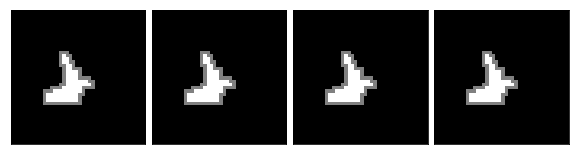

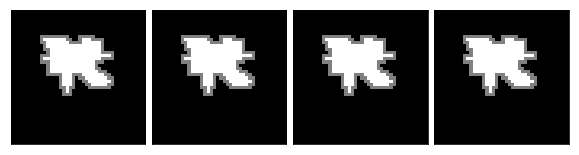

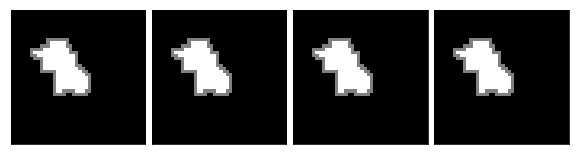

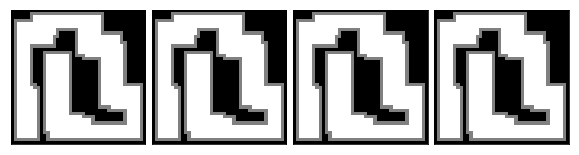

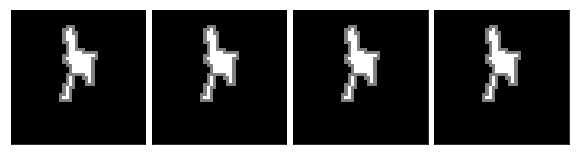

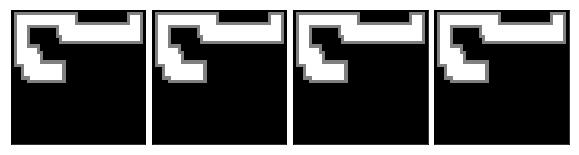

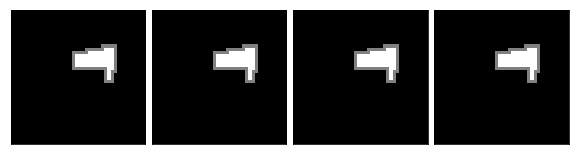

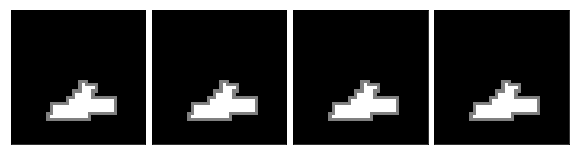

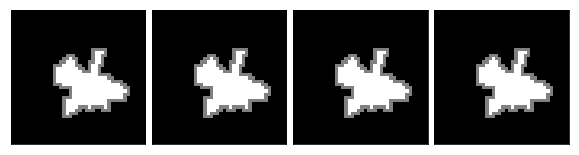

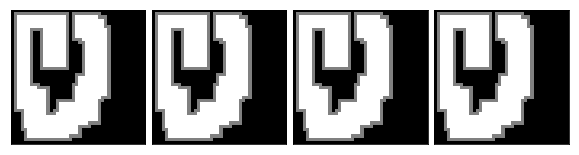

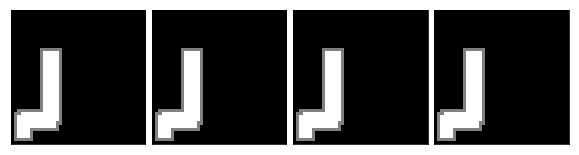

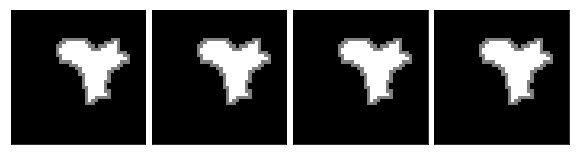

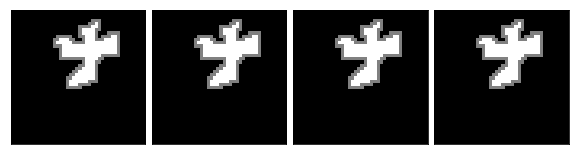

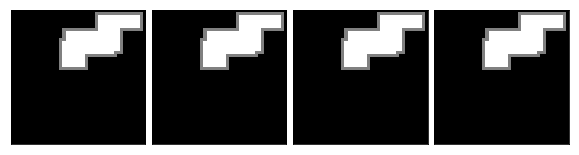

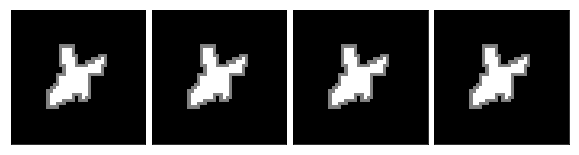

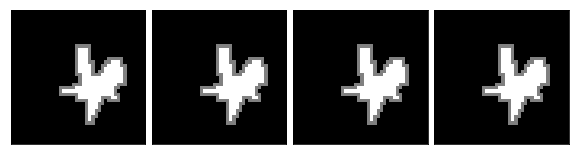

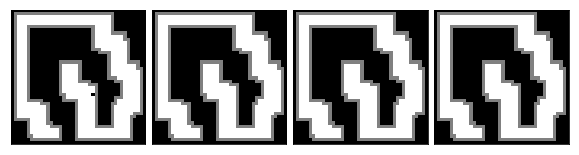

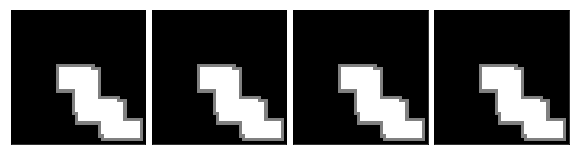

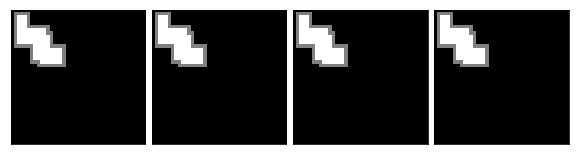

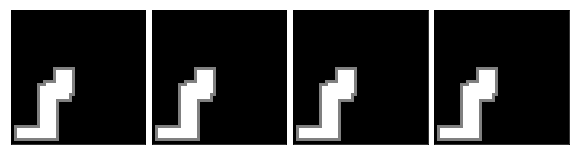

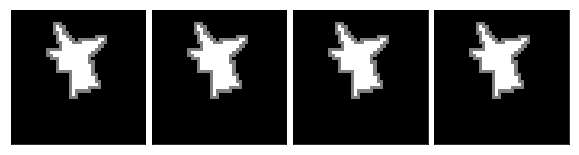

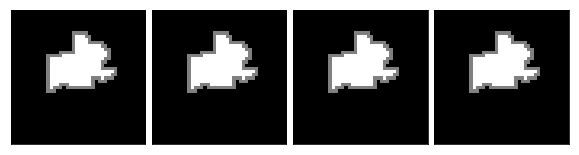

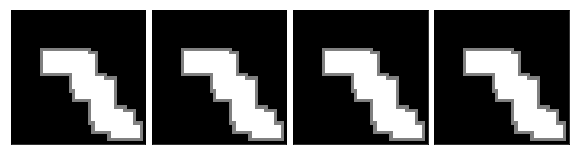

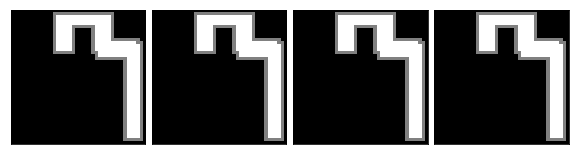

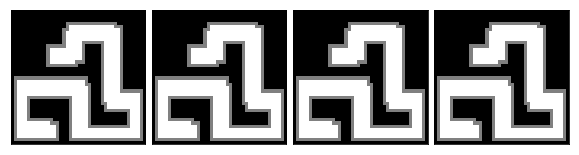

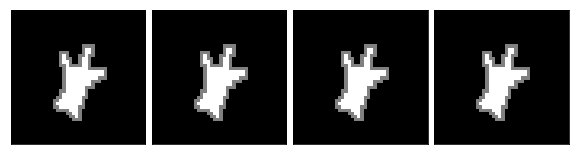

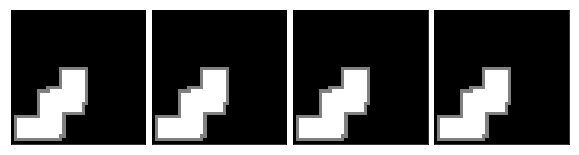

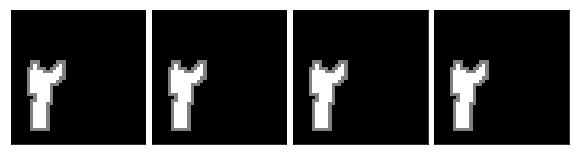

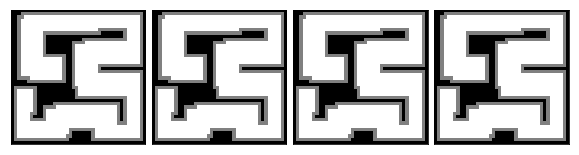

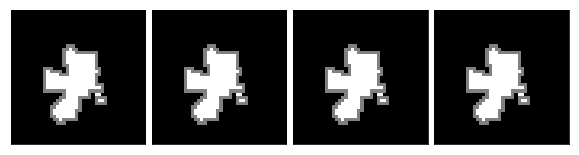

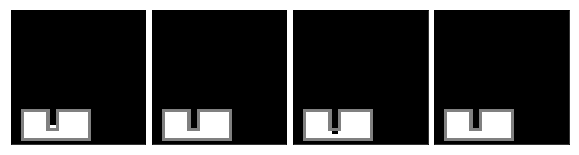

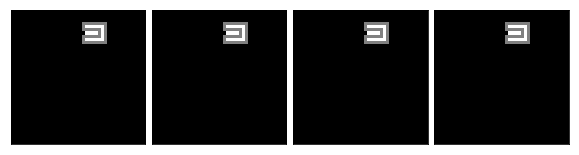

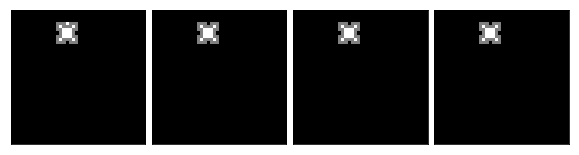

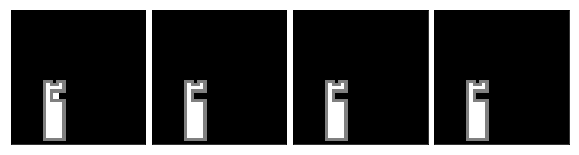

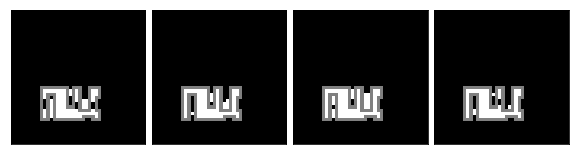

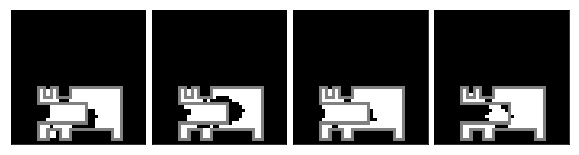

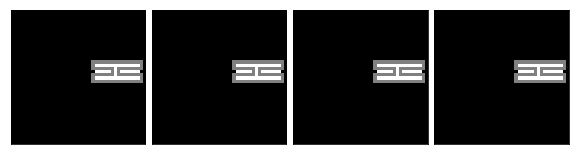

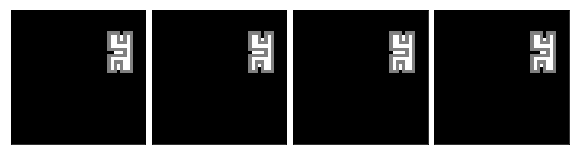

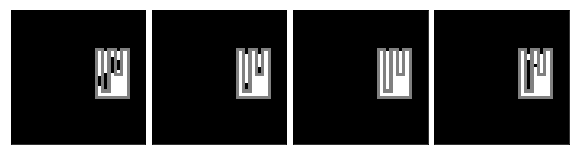

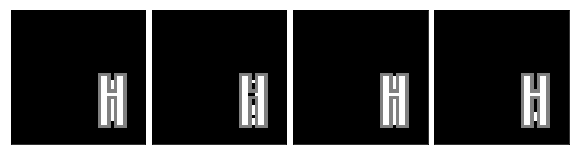

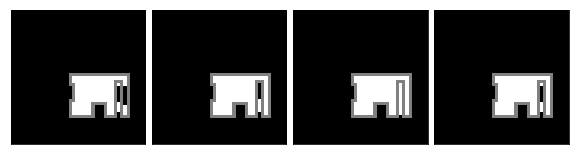

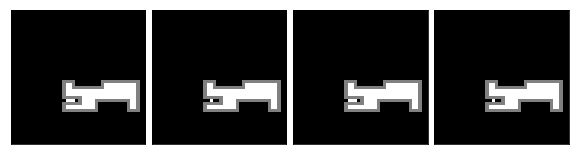

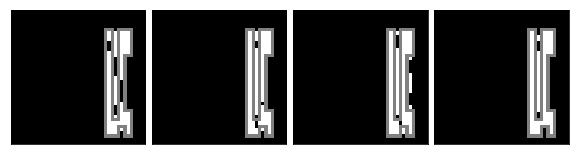

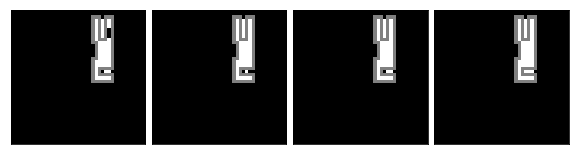

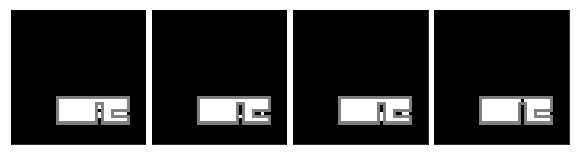

In [3]:
for num_image in range(30):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 1
    plt.subplots_adjust(wspace=0.05, hspace=0)    
    id_im = 0
    for k in [1,3,2,0]:
        ax = []
        #for k in range(col*row):
        in_im = np.squeeze(data_point[k][0][1][num_image,:,:])
        out_pred = np.squeeze(-data_point[k][0][3][num_image,:,:]+1)

            
        mask = -in_im + 1
        im = out_pred*mask + in_im*0.5
        ax.append( fig.add_subplot(rows, columns, id_im+1) )
        plt.imshow(-im, cmap='gray')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        id_im +=1
    fig.savefig('./fig/qualitative/'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight', dpi=1000)

#DIG DATASET
for num_image in range(15):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 1
    plt.subplots_adjust(wspace=0.05, hspace=0.0)
    id_im =0
    for k in [1,3,2,0]:
        ax = []
        #for k in range(col*row):
        
        in_im = np.squeeze(data_point_square[k][0][1][num_image,:,:])
        out_pred = np.squeeze(-data_point_square[k][0][3][num_image,:,:]+1)
        
        mask = -in_im + 1
        im = out_pred*mask + in_im*0.5
        ax.append( fig.add_subplot(rows, columns, id_im+1) )
        plt.imshow(-im, cmap='gray')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        id_im += 1
    fig.savefig('./fig/qualitative/'+ str(num_image+30) + '.pdf', format='pdf',  bbox_inches='tight', dpi=1000)

In [ ]:
np.shape(data_point[0][0][1])

In [ ]:
for num_image in range(10):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4
    


    ax = []
    #for k in range(col*row):
    ax.append( fig.add_subplot(rows, columns, 1) )
    plt.imshow(np.squeeze(data_point[0][1][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 2) )
    plt.imshow(np.squeeze(data_point[0][2][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 3) )
    plt.imshow(np.squeeze(data_point[0][3][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 4) )
    plt.imshow(np.squeeze(data_point[0][4][num_image,:,:]), cmap='gray')
    plt.axis('off')
    
    #BATCH, SAVE, LAYER, TIME, C/H
    for k in range(2):#,columns*(rows-1)):
        ax.append( fig.add_subplot(rows, columns, 5+k) )
        plt.imshow(np.squeeze(data_point[0][0][1][27][num_image,:,:,k]), cmap='gray') #15:45
        plt.axis('off')
    

In [ ]:
for num_image in range(10):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4


    ax = []
    #for k in range(col*row):
    ax.append( fig.add_subplot(rows, columns, 1) )
    plt.imshow(np.squeeze(data_point[0][1][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 2) )
    plt.imshow(np.squeeze(data_point[0][2][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 3) )
    plt.imshow(np.squeeze(data_point[0][3][num_image,:,:]), cmap='gray')
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 4) )
    plt.imshow(np.squeeze(data_point[0][4][num_image,:,:]), cmap='gray')
    plt.axis('off')
    
    
    for k in range(columns*(rows-1)):
        ax.append( fig.add_subplot(rows, columns, 5+k) )
        plt.imshow(np.squeeze(data_point[0][0][6][num_image,:,:,k]), cmap='gray') #15:45
        plt.axis('off')

In [ ]:
np.shape(data_point[0])

In [ ]:
NUM_BATCH = 2
LAYER = 3
NUM_TOP_CELLS = 9

import copy
for k in range(np.shape(data_point[0][0][LAYER])[-1]):
    idx = np.zeros([NUM_TOP_CELLS, 4]) #batch num, num image, x, y
    act = np.zeros([NUM_TOP_CELLS])
    idx_min = 0
    for j in range(np.shape(data_point[0][0][LAYER])[0]):
        for i in range(NUM_BATCH):
            if np.amax(data_point[i][0][LAYER][j,:,:,k]) > act[idx_min]:
                idx[idx_min, 0] = i
                idx[idx_min, 1] = j
                dd = data_point[i][0][LAYER][j,:,:,k]
                idx[idx_min, 2] =  np.unravel_index(np.argmax(dd), dd.shape)[0]
                idx[idx_min, 3] =np.unravel_index(np.argmax(dd), dd.shape)[1]
                act[idx_min] = np.amax(data_point[i][0][LAYER][j,:,:,k])
                
                idx_min = 0
                for ind in range(NUM_TOP_CELLS):
                    if act[ind] < act[idx_min]:
                        idx_min = ind
                   
    fig = plt.figure(figsize=(8, 8))
    columns = np.sqrt(NUM_TOP_CELLS)
    rows = np.sqrt(NUM_TOP_CELLS)
    ax = []
    
    for ind in range(NUM_TOP_CELLS):
        ax.append( fig.add_subplot(rows, columns, ind+1) )
        idd = idx[ind,:].astype(int)
        im = copy.deepcopy(np.squeeze(data_point[idd[0]][1][idd[1],:,:]))
        im[idd[2],idd[3]] = 10        
        plt.imshow(im)
        plt.axis('off')
    

In [ ]:
np.shape(data_point[0][0][1])

In [ ]:
run_opt[11].name